Modified version of "k Means Clustering for Ch10 of Machine Learning in Action"
(original author: Peter Harrington)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def loadData(filename, sep, header): #data loader using pandas
    df = pd.read_table(filename,sep=sep,header=header)
    df = df.fillna(df.mean()) #set NaN values to mean
    return np.array(df) #convert to a numpy array (matrix)

In [3]:
dataMat = loadData('testSet.txt',sep='\t',header=None) #delimiter is Tab, no header
dataMat.shape

(80, 2)

Exercise 1: implement standard k-means algorithm

In [4]:
def randCent(dataSet, k):  #function to initialize seeds for each cluster
    n = np.shape(dataSet)[1]
    centroids = np.mat(np.zeros((k,n)))#create centroid mat
    for j in range(n):#create random cluster centers, within bounds of each dimension
        minJ = min(dataSet[:,j]) 
        rangeJ = float(max(dataSet[:,j]) - minJ)
        centroids[:,j] = np.mat(minJ + rangeJ * np.random.rand(k,1))
    return centroids

In [5]:
def kMeans(dataSet, k):
    m = np.shape(dataSet)[0] #number of data points
    clusterAssment = np.mat(np.zeros((m,2)))#create mat to assign data points 
                                      #0th column: index of the current cluster to which each data is assigned
                                      #1st column: distance to that cluster

    centroids = randCent(dataSet, k)  #initialize cluster centroids
    clusterChanged = True  #flag for termination (if false)
    while clusterChanged:
        clusterChanged = False
        for i in range(m):#for each data point assign it to the closest centroid
            minDist = np.inf; minIndex = -1
            for j in range(k):
                distJI = np.linalg.norm(centroids[j,:]-dataSet[i,:]) #simply use L2 distance today
                if distJI < minDist:
                    minDist = distJI; minIndex = j
            if clusterAssment[i,0] != minIndex: clusterChanged = True
            clusterAssment[i,:] = minIndex,minDist**2
        print(centroids)
        for cent in range(k):#recalculate centroids
            ptsInClust = dataSet[np.nonzero(clusterAssment[:,0].A==cent)[0]]#get all the point in this cluster
            centroids[cent,:] = np.mean(ptsInClust, axis=0) #assign centroid to mean 
    return centroids, clusterAssment

[[-4.84961452  4.54716257]
 [ 4.80118933 -2.77197195]
 [ 0.51600651  4.98754334]
 [-0.78034735  2.89601416]]
[[-3.67036525  3.311776  ]
 [ 2.59258145 -2.78274655]
 [ 2.624524    3.53268467]
 [-2.30800636 -0.01725267]]
[[-2.54183917  2.93204467]
 [ 2.65077367 -2.79019029]
 [ 2.6265299   3.10868015]
 [-3.36822843 -2.4767769 ]]
[[-2.46154315  2.78737555]
 [ 2.65077367 -2.79019029]
 [ 2.6265299   3.10868015]
 [-3.53973889 -2.89384326]]


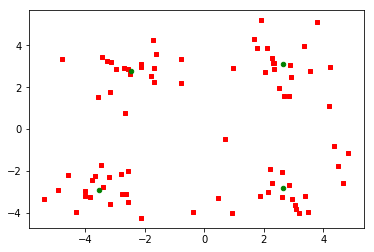

In [6]:
myCentroids, clustAssign = kMeans(dataMat,k=4)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(dataMat[:,0]),np.array(dataMat[:,1]),s=20,c='red',marker='s')
ax.scatter(np.array(myCentroids[:,0]),np.array(myCentroids[:,1]),s=20,c='green',marker='o')
plt.show()


Bonus: Bisecting k-means

In [7]:
def biKmeans(dataSet, k):
    m = np.shape(dataSet)[0]
    clusterAssment = np.mat(np.zeros((m,2)))
    centroid0 = np.mean(dataSet, axis=0).tolist()[0]
    centList =[centroid0] #create a list with one centroid
    for j in range(m):#calc initial Error
        clusterAssment[j,1] = np.linalg.norm(np.mat(centroid0)-dataSet[j,:])**2
    while (len(centList) < k):
        lowestSSE = np.inf
        for i in range(len(centList)):
            ptsInCurrCluster = dataSet[np.nonzero(clusterAssment[:,0].A==i)[0],:]#get the data points currently in cluster i
            centroidMat, splitClustAss = kMeans(ptsInCurrCluster, 2) #call usual k-means internally
            sseSplit = sum(splitClustAss[:,1])#compare the SSE to the currrent minimum
            sseNotSplit = sum(clusterAssment[np.nonzero(clusterAssment[:,0].A!=i)[0],1])
            print("sseSplit, and notSplit: ",sseSplit,sseNotSplit)
            if (sseSplit + sseNotSplit) < lowestSSE:
                bestCentToSplit = i
                bestNewCents = centroidMat
                bestClustAss = splitClustAss.copy()
                lowestSSE = sseSplit + sseNotSplit
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 1)[0],0] = len(centList) #change 1 to 3,4, or whatever
        bestClustAss[np.nonzero(bestClustAss[:,0].A == 0)[0],0] = bestCentToSplit
        print('the bestCentToSplit is: ',bestCentToSplit)
        print('the len of bestClustAss is: ', len(bestClustAss))
        centList[bestCentToSplit] = bestNewCents[0,:].tolist()[0]#replace a centroid with two best centroids 
        centList.append(bestNewCents[1,:].tolist()[0])
        clusterAssment[np.nonzero(clusterAssment[:,0].A == bestCentToSplit)[0],:]= bestClustAss#reassign new clusters, and SSE
    return np.mat(centList), clusterAssment

[[ 1.65266448  3.49186753]
 [ 1.55111902  2.11357422]]
[[ 0.65640186  3.55400509]
 [-0.39189479 -1.27317269]]
[[ 0.34421986  3.07632743]
 [-0.48895795 -2.54604695]]
[[ 0.08249338  2.94802785]
 [-0.2897198  -2.83942545]]
sseSplit, and notSplit:  [[ 792.91685654]] 0
the bestCentToSplit is:  0
the len of bestClustAss is:  80
[[-1.64270454  1.68405982]
 [ 2.78793207  3.49859104]]
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]
sseSplit, and notSplit:  [[ 66.36683512]] [[ 466.63278134]]
[[-1.47250829 -1.97799766]
 [-0.79151422 -3.14715757]]
[[-3.43611361 -2.65179672]
 [ 2.28460241 -2.99293986]]
[[-3.53973889 -2.89384326]
 [ 2.65077367 -2.79019029]]
sseSplit, and notSplit:  [[ 84.25921395]] [[ 326.2840752]]
the bestCentToSplit is:  1
the len of bestClustAss is:  40
[[-2.98414508  4.03370667]
 [-0.56506646  4.64174918]]
[[-2.70030241  2.70457282]
 [ 2.13934243  3.12797287]]
[[-2.46154315  2.78737555]
 [ 2.6265299   3.10868015]]
sseSplit, and notSplit:  [[ 66.36683512]] [[ 84.25921395]]

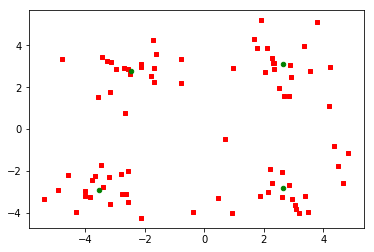

In [8]:
myCentroids, clustAssign = biKmeans(dataMat,k=4)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.array(dataMat[:,0]),np.array(dataMat[:,1]),s=20,c='red',marker='s')
ax.scatter(np.array(myCentroids[:,0]),np.array(myCentroids[:,1]),s=20,c='green',marker='o')
plt.show()